In [1]:
from datasets import load_dataset
import pandas as pd

/Users/vetonmatoshi/opt/anaconda3/envs/bfh/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import tiktoken
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [20]:
load_dataset('joelito/lextreme')

ValueError: Config name is missing.
Please pick one among the available configs: ['brazilian_court_decisions_judgment', 'brazilian_court_decisions_unanimity', 'swiss_judgment_prediction', 'german_argument_mining', 'greek_legal_code_volume', 'greek_legal_code_chapter', 'greek_legal_code_subject', 'online_terms_of_service_unfairness_levels', 'turkish_constitutional_court_decisions_judgment', 'swiss_criticality_prediction_bge_facts', 'swiss_criticality_prediction_bge_considerations', 'swiss_criticality_prediction_citation_facts', 'swiss_criticality_prediction_citation_considerations', 'swiss_law_area_prediction_facts', 'swiss_law_area_prediction_considerations', 'swiss_law_area_prediction_sub_area_facts', 'swiss_law_area_prediction_sub_area_considerations', 'swiss_judgment_prediction_xl_facts', 'swiss_judgment_prediction_xl_considerations', 'online_terms_of_service_clause_topics', 'covid19_emergency_event', 'multi_eurlex_level_1', 'multi_eurlex_level_2', 'multi_eurlex_level_3', 'lener_br', 'legalnero', 'greek_legal_ner', 'mapa_coarse', 'mapa_fine']
Example of usage:
	`load_dataset('lextreme', 'brazilian_court_decisions_judgment')`

In [21]:
dataset = load_dataset('joelito/lextreme', 'covid19_emergency_event')
dataset

Generating train split: 0 examples [00:00, ? examples/s]Using custom data configuration joelito--covid19_emergency_event-387876624e46d3d3
Found cached dataset json (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___json/joelito--covid19_emergency_event-387876624e46d3d3/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Generating validation split: 0 examples [00:00, ? examples/s]    Using custom data configuration joelito--covid19_emergency_event-387876624e46d3d3
Found cached dataset json (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___json/joelito--covid19_emergency_event-387876624e46d3d3/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)
Generating test split: 0 examples [00:00, ? examples/s]          Using custom data configuration joelito--covid19_emergency_event-387876624e46d3d3
Found cached dataset json (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___json/joelito--covid19_emergency_event-387876624e46d3d3/0.0.

Dataset lextreme downloaded and prepared to /Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/covid19_emergency_event/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789. Subsequent calls will reuse this data.


100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1029.28it/s]


DatasetDict({
    train: Dataset({
        features: ['input', 'label', 'language'],
        num_rows: 3312
    })
    validation: Dataset({
        features: ['input', 'label', 'language'],
        num_rows: 418
    })
    test: Dataset({
        features: ['input', 'label', 'language'],
        num_rows: 418
    })
})

In [22]:
dataset['train'].features['label'].feature.names

['event1',
 'event2',
 'event3',
 'event4',
 'event5',
 'event6',
 'event7',
 'event8']

# Count labels per config

In [64]:
all_tasks = [
    "swiss_criticality_prediction_bge_considerations",
    "swiss_criticality_prediction_bge_facts",
    "swiss_criticality_prediction_citation_considerations",
    "swiss_criticality_prediction_citation_facts",
    "swiss_judgment_prediction_xl_considerations",
    "swiss_judgment_prediction_xl_facts",
    "swiss_law_area_prediction_facts",
    "swiss_law_area_prediction_considerations",
    "swiss_law_area_prediction_sub_area_considerations",
    "swiss_law_area_prediction_sub_area_facts"
  ]

for t in all_tasks:
    dataset = load_dataset("joelito/lextreme", t)
    labels = set()
    for split in ['train','validation', 'test']:
        for l in dataset[split].features['label'].names:
            labels.add(l)
    print(t,': ',len(labels))
    
    

Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_bge_considerations/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)
100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56.45it/s]


swiss_criticality_prediction_bge_considerations :  2


Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_bge_facts/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)
100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 83.93it/s]


swiss_criticality_prediction_bge_facts :  2


Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_citation_considerations/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)
100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 445.03it/s]


swiss_criticality_prediction_citation_considerations :  4


Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_citation_facts/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)
100%|████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 854.70it/s]

swiss_criticality_prediction_citation_facts :  4


KeyboardInterrupt: 

# Check if any input exceeds 4096

In [69]:
all_data = []
for task in all_tasks:
    df = pd.read_json("../data/instruction-following-examples/"+task+".jsonl", lines=True)
    df['finetuning_task']=task
    all_data.append(df)
all_data = pd.concat(all_data)
all_data['length']=all_data.input_text.apply(lambda x: len(tokenizer.encode(x)))
all_data[all_data.length>4000]
print(len(all_data))
print(len(all_data.input_text.unique()))

7183
7168


<AxesSubplot: >

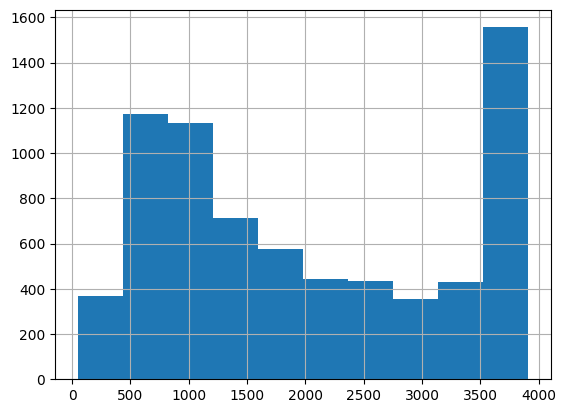

In [66]:
all_data.length.hist()

<AxesSubplot: xlabel='finetuning_task,language'>

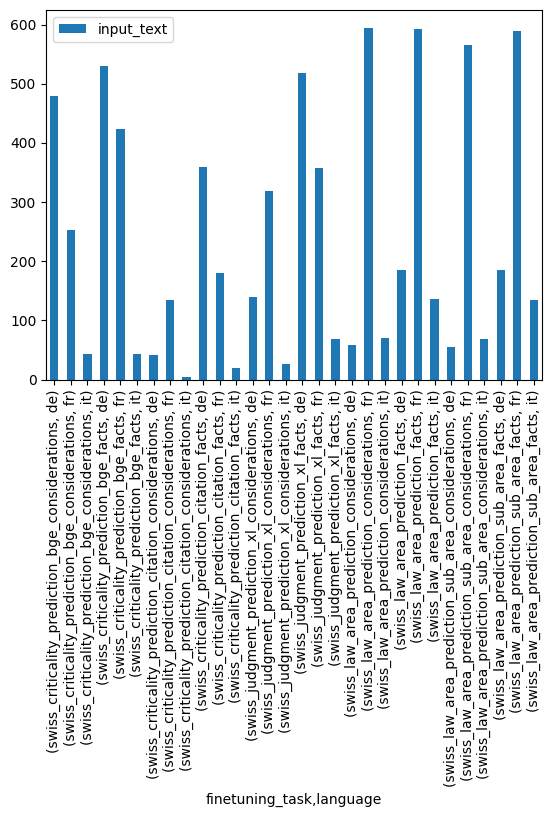

In [67]:
all_data[['input_text','finetuning_task','language']].groupby(['finetuning_task','language']).count().plot.bar()

In [83]:
task = 'swiss_judgment_prediction_xl_facts'
dataset = load_dataset('joelito/lextreme', task, split="validation")
labels = dataset.features['label'].names
print(labels)

def return_label(dataset, _input):
    results =  dataset.filter(lambda x: _input in x['input'])['label']
    results = [labels[r] for r in results]
    return results

'''sub_df = all_data[all_data.finetuning_task==task]
sub_df['label_to_check']=sub_df.input.apply(lambda _input:return_label(dataset,_input))'''


Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_judgment_prediction_xl_facts/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)


['dismissal', 'approval']


"sub_df = all_data[all_data.finetuning_task==task]\nsub_df['label_to_check']=sub_df.input.apply(lambda _input:return_label(dataset,_input))"

In [85]:
search = "ngelegenheiten ans Bundesgericht vom 17. August 2016 beantragen die genannten Personen, das Urteil des Verwaltungsgerichts sei aufzuheben. Die Quartierplanvorschriften und der Verteilschlüssel seien insofern anzupassen, als die Gemeinde Bever zu verpflichten sei, A. und B. C._ Fr. 13'000.--, D. F._ Fr. 41'000."
return_label(dataset, search)

100%|█████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 71.99ba/s]


['approval']

In [ ]:
print(all_data[all_data.finetuning_task=='swiss_criticality_prediction_citation_facts'].input_text.tolist()[0])

# Predictions

In [53]:
all_data = []
for task in all_tasks:
    df = pd.read_json("../data/zero-shot-predictions/"+task+"_gpt-3.5-turbo_predictions.jsonl", lines=True)
    df['finetuning_task']=task
    all_data.append(df)
all_data = pd.concat(all_data)
all_data['length']=all_data.input_text.apply(lambda x: len(tokenizer.encode(x)))
all_data

,input_text,language,answer,prediction,finetuning_task,length
0,Given the considerations from the following Sw...,fr,non-critical,critical,swiss_criticality_prediction_bge_considerations,3726
1,Given the considerations from the following Sw...,fr,non-critical,None,swiss_criticality_prediction_bge_considerations,2290
2,Given the considerations from the following Sw...,de,non-critical,critical,swiss_criticality_prediction_bge_considerations,1068
3,Given the considerations from the following Sw...,de,non-critical,non-critical,swiss_criticality_prediction_bge_considerations,985
4,Given the considerations from the following Sw...,fr,non-critical,non-critical,swiss_criticality_prediction_bge_considerations,1792
...,...,...,...,...,...,...
906,Given the facts from the following court decis...,it,Public Administration,Tax,swiss_law_area_prediction_sub_area_facts,1017
907,Given the facts from the following court decis...,de,Rental and Lease,Urban Planning and Environmental.,swiss_law_area_prediction_sub_area_facts,1230
908,Given the facts from the following court decis...,de,Public Administration,Tax.,swiss_law_area_prediction_sub_area_facts,671
909,Given the facts from the following court decis...,it,Intellectual Property,Substantive Criminal,swiss_law_area_prediction_sub_area_facts,2415


In [63]:
print(all_data.input_text.tolist()[4001])

Given the facts from the following court decision:
"considérant en fait
A. A._ exerçait les fonctions de président du comité et de directeur technique et artistique de l’Association C._ (ci-après: l’Association) dont le but était d’organiser des festivals de jazz en ville de D._, à l’instar de E._ qui se tenait chaque année sur la Place F._. Au cours de l’assemblée générale du 6 mars 2014, il a été remplacé à la présidence du comité de l’Association par G._ mais a conservé sa fonction de directeur technique et artistique au bénéfice d’un contrat de travail. H._ était porte-parole de l’Association.
Le projet était d’organiser une édition de E._ du 3 au 12 juillet 2014 sur l’ancien site de l’entreprise I._ à J._, la ville de D._ n’ayant pas autorisé la poursuite de cette manifestation sur son site « historique » de la Place F._.
Le 3 juillet 2014, le comité de l’Association a licencié A._ et l’a relevé de sa fonction avec effet immédiat. Le même jour, le Préfet de la Sarine a suspendu so

In [58]:
text ='Le recours en matière pénale (art. 78 al. 1 LTF) est ouvert contre une décision relative à la détention provisoire ou pour des motifs de sûreté au sens des art. 212 ss CPP. Formé en temps utile (art. 100 al. 1 LTF) contre une décision prise en dernière instance cantonale (art. 80 LTF) et qui touche le recourant dans ses intérêts juridiquement protégés (art. 81 al. 1 let. a et b ch. 1 LTF), le recours en matière pénale est recevable.'

In [61]:
ds = load_dataset('joelito/lextreme', 'swiss_criticality_prediction_bge_considerations')['validation']
ds.filter(lambda x:text in x['input'])['label']

Found cached dataset lextreme (/Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_bge_considerations/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789)
100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 55.05it/s]
Loading cached processed dataset at /Users/vetonmatoshi/.cache/huggingface/datasets/joelito___lextreme/swiss_criticality_prediction_bge_considerations/1.0.0/1ff43827e332c8df88094d1f980fbd6d1a4d5fe8733b85cd37e7e3b20290b789/cache-2a8f6ead34f26710.arrow


[1]

In [48]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
report = classification_report(y_true, y_pred, target_names=target_names,output_dict=True)


In [51]:
pd.DataFrame(report)

,class 0,class 1,class 2,accuracy,macro avg,weighted avg
precision,0.500000,0.0,1.000000,0.6,0.500000,0.700000
recall,1.000000,0.0,0.666667,0.6,0.555556,0.600000
f1-score,0.666667,0.0,0.800000,0.6,0.488889,0.613333
support,1.000000,1.0,3.000000,0.6,5.000000,5.000000


In [52]:
report

{'class 0': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 1},
 'class 1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'class 2': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 3},
 'accuracy': 0.6,
 'macro avg': {'precision': 0.5,
  'recall': 0.5555555555555555,
  'f1-score': 0.48888888888888893,
  'support': 5},
 'weighted avg': {'precision': 0.7,
  'recall': 0.6,
  'f1-score': 0.6133333333333334,
  'support': 5}}

In [86]:
pd.read_excel("/Users/vetonmatoshi/Documents/Git/zeroshot_lexglue/reports/evaluation_report_swiss_criticality_prediction_citation_facts.xlsx")

,Unnamed: 0,critical-1,critical-2,critical-3,critical-4,micro avg,macro avg,weighted avg,samples avg,finetuning_task,question unanswered,noisy answers
0,precision,0.390244,0.250000,0.196429,0.152174,0.246429,0.247212,0.267302,0.246429,swiss_criticality_prediction_citation_facts,0,0
1,recall,0.173913,0.434211,0.251908,0.075269,0.246429,0.233825,0.246429,0.246429,swiss_criticality_prediction_citation_facts,0,0
2,f1-score,0.240602,0.317308,0.220736,0.100719,0.246429,0.219841,0.233544,0.246429,swiss_criticality_prediction_citation_facts,0,0
3,support,184.000000,152.000000,131.000000,93.000000,560.000000,560.000000,560.000000,560.000000,swiss_criticality_prediction_citation_facts,0,0


In [87]:
pd.read_json("/Users/vetonmatoshi/Documents/Git/zeroshot_lexglue/data/instruction-following-examples/swiss_criticality_prediction_bge_considerations.jsonl", lines=True)

,input_text,language,answer,label,input
0,Given the considerations from the following Sw...,fr,non-critical,1,Considérant en droit :\n1.\nLe recours en mati...
1,Given the considerations from the following Sw...,fr,non-critical,1,Considérant en droit :\n1.\nLe recours peut êt...
2,Given the considerations from the following Sw...,de,non-critical,1,"in Erwägung,\ndass gegen den in einer vermögen..."
3,Given the considerations from the following Sw...,de,non-critical,1,Der Präsident zieht in Erwägung:\n1.\nDie Besc...
4,Given the considerations from the following Sw...,fr,non-critical,1,Considérant :\nqu'invoquant les séquelles d'un...
...,...,...,...,...,...
770,Given the considerations from the following Sw...,fr,non-critical,1,Considérant en droit :\n1.\n1.1. Le recours en...
771,Given the considerations from the following Sw...,fr,non-critical,1,Considérant en droit :\n1. 1.1 Le Tribunal féd...
772,Given the considerations from the following Sw...,de,non-critical,1,"In Erwägung,\ndass der Beschwerdeführer mit Ei..."
773,Given the considerations from the following Sw...,de,non-critical,1,Erwägungen:\n1.\nAngefochten ist ein kantonal ...


In [119]:
preds = pd.read_json("/Users/vetonmatoshi/Documents/Git/zeroshot_lexglue/data/zero-shot-predictions/swiss_criticality_prediction_bge_considerations_gpt-3.5-turbo_predictions.jsonl", lines=True)
preds['prediction'] = preds.prediction.apply(lambda x: str(x).lower().strip('\.'))

In [120]:
preds.groupby('answer').count()

,input_text,language,prediction
answer,,,
critical,14,14,14
non-critical,761,761,761


In [121]:
preds.groupby('prediction').count()

,input_text,language,answer
prediction,,,
critical,272,272,272
non-critical,502,502,502
"non-critical. \n\nthis is because the decision does not contain any particularly important or groundbreaking legal interpretations or applications, and is primarily concerned with administrative and procedural matters related to a specific case in the canton of zurich. additionally, the decision does not appear to have been widely publicized or cited in subsequent legal proceedings",1,1,1


In [109]:
sample_list = ['non-critical','critical']
sample_list[1]

'critical'

In [110]:
sorted(sample_list)[1]

'non-critical'